In [191]:
import numpy as np
import pandas as pd
import bisect
import types
from matplotlib import pyplot as plt
%matplotlib inline

In [201]:
class k_nearest_neighbors:
    def __init__(self, n_neighbors, category0=0, category1=1):
        self.n_neighbors = n_neighbors
        self.X = pd.DataFrame()
        self.Y = pd.DataFrame()
        self.category0 = category0
        self.category1 = category1
        self.vote1 = 0
        self.vote2 = 0
        
    # 2-columns data X    
    def fit(self, X, Y):
        self.X['col1'] = X[X.columns[0]]
        self.X['col2'] = X[X.columns[1]]
        self.Y['col'] = Y
    
    # 2-dim list Z
    def predict(self, Z):
        distance = []
        orderIndex = []
        npos = 0
        value = 0.0
        tot = range(self.X.shape[0])
        for i in tot:
            npos = 0
            value = (self.X.loc[i, 'col1'] - Z[0])**2 + (self.X.loc[i, 'col2'] - Z[1])**2
            for j in range(len(distance)):
                if distance[j] > value:
                    npos = j
                    distance.insert(npos, value)
                    orderIndex.insert(npos, i)
                    break
                else:
                    npos += 1
            else:
                distance.append(value)
                orderIndex.append(i)
        # calculate probabilities
        vote1 = 0
        vote2 = 0
        for k in range(self.n_neighbors):
            if type(self.Y.loc[k, 'col']) == bool:
                if (self.Y.loc[k, 'col'] & self.category0) | ((not self.Y.loc[k, 'col']) & (not self.category0)):
                    vote1 += 1
                elif (self.Y.loc[k, 'col'] & self.category1) | ((not self.Y.loc[k, 'col']) & (not self.category1)):
                    vote2 += 1
                else:
                    raise ValueError("Category value must be 0 or 1")
            else:
                if str(self.Y.loc[k, 'col']).lower() == str(self.category0).lower():
                    print('category = {}'.format(self.Y.loc[k, 'col']))
                    vote1 += 1
                elif str(self.Y.loc[k, 'col']).lower() == str(self.category1).lower():
                    print('category = {}'.format(self.Y.loc[k, 'col']))
                    vote2 += 1
                else:
                    raise ValueError("Category value must be 0 or 1")
                
        print("vote1 = {}".format(vote1))
        print("vote2 = {}".format(vote2))
        self.vote1 = vote1
        self.vote2 = vote2
        return self.category0 if vote1 > vote2 else self.category1
    
    # 2-dim list Z
    def predict_prob(self, Z):
        if self.vote1 > 0:
            return (self.vote1 / (self.vote1 + self.vote2)), (self.vote2 / (self.vote1 + self.vote2))
        else:
            raise ValueError("Please run predict(Z) first")

In [202]:
# Here is a test case
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 205, 110, 307, 110, 397, 153, 190, 192, 210, 403, 164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 20, 10, 17, 51, 7, 13, 19, 12, 21, 22, 16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [203]:
X = pd.DataFrame()
Y = pd.DataFrame()
X = music[['duration', 'loudness']]
Y = music['jazz']

In [204]:
model = k_nearest_neighbors(3)
model.fit(X, Y)

In [205]:
Z = (290, 18)
aa = model.predict(Z)

category = 1
category = 0
category = 0
vote1 = 2
vote2 = 1


In [206]:
print(model.predict_prob(Z))

(0.6666666666666666, 0.3333333333333333)


[0]
[[0.66666667 0.33333333]]


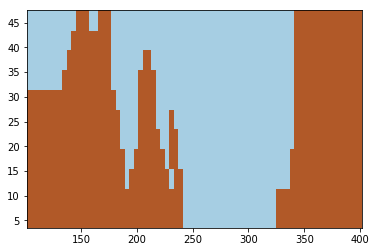

In [209]:
# Here is fitting with sklearn's model KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3)

neighbors.fit(X, Y)
print(neighbors.predict([[290, 18]]))
print(neighbors.predict_proba([[290, 18]]))

X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z0 = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z0 = Z0.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z0)